## Problem: Minimum Height Trees
LeetCode : 310. Minimum Height Trees

https://leetcode.com/problems/minimum-height-trees/

A tree is an undirected graph in which any two vertices are connected by exactly one path. In other words, any connected graph without simple cycles is a tree.

Given a tree of n nodes labelled from 0 to n - 1, and an array of n - 1 edges where edges[i] = [ai, bi] indicates that there is an undirected edge between the two nodes ai and bi in the tree, you can choose any node of the tree as the root. When you select a node x as the root, the result tree has height h. Among all possible rooted trees, those with minimum height (i.e. min(h))  are called minimum height trees (MHTs).

Return a list of all MHTs' root labels. You can return the answer in any order.

The height of a rooted tree is the number of edges on the longest downward path between the root and a leaf.

 

Example 1:

   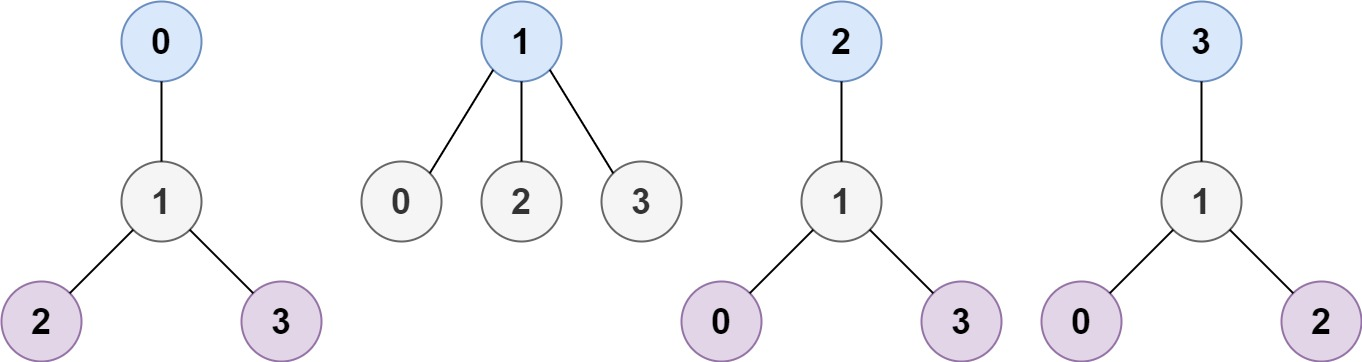

    Input: n = 4, edges = [[1,0],[1,2],[1,3]]
    Output: [1]
    Explanation: As shown, the height of the tree is 1 when the root is the node with label 1 which is the only MHT.
Example 2:


    Input: n = 6, edges = [[3,0],[3,1],[3,2],[3,4],[5,4]]
    Output: [3,4]
 

Constraints:

    1 <= n <= 2 * 104
    edges.length == n - 1
    0 <= ai, bi < n
    ai != bi
    All the pairs (ai, bi) are distinct.
    The given input is guaranteed to be a tree and there will be no repeated edges.

### Approach:
From the above-mentioned examples, we can clearly see that any leaf node (i.e., node with only one edge) can never give us an MHT because its adjacent non-leaf nodes will always give an MHT with a smaller height. All the adjacent non-leaf nodes will consider the leaf node as a subtree.

Let’s understand this with another example. Suppose we have a tree with root M and height 5. Now, if we take another node, say P, and make the M tree as its subtree, then the height of the overall tree with root P will be 6 (=5+1). Now, this whole tree can be considered a graph, where P is a leaf as it has only one edge (connection with M). This clearly shows that the leaf node P gives us a tree of height 6 whereas its adjacent non-leaf node M gives us a tree with smaller height 5 - since P will be a child of M.

This gives us a strategy to find MHTs. Since leaves can’t give us MHT, we can remove them from the graph and remove their edges too. Once we remove the leaves, we will have new leaves. Since these new leaves can’t give us MHT, we will repeat the process and remove them from the graph too. We will prune the leaves until we are left with one or two nodes which will be our answer and the roots for MHTs.

We can implement the above process using the topological sort. Any node with only one edge (i.e., a leaf) can be our source and, in a stepwise fashion, we can remove all sources from the graph to find new sources. We will repeat this process until we are left with one or two nodes in the graph, which will be our answer.

In [32]:
from collections import deque
def findTrees(nodes, edges):
    if nodes == 1:
        return [0]
    graph = [[] for _ in range(nodes)]
    inorder = [0]*nodes
    
    for edge in edges:
        graph[edge[0]].append(edge[1])
        graph[edge[1]].append(edge[0])
        inorder[edge[0]] += 1
        inorder[edge[1]] += 1
    
    leaveNodes = deque([l for l in range(len(inorder)) if inorder[l] == 1])
    
    totalNodes = nodes
    while totalNodes > 2:
        leavesSize = len(leaveNodes)
        totalNodes -= leavesSize
        for i in range(leavesSize):
            node = leaveNodes.popleft()
            for k in graph[node]:
                inorder[k] -= 1
                if inorder[k] == 1:
                    leaveNodes.append(k)
                    
    return list(leaveNodes)
        
    

In [33]:
nodes = 6
edges = [[3,0],[3,1],[3,2],[3,4],[5,4]]
findTrees(nodes, edges)

[3, 4]

In [34]:
nodes = 4
edges = [[1,0],[1,2],[1,3]]
findTrees(nodes, edges)

[1]

In [35]:
nodes =4
edges = [[0, 1], [0, 2], [2, 3]]
findTrees(nodes, edges)

[0, 2]